In [94]:
# Importing all libraries that we may need 

import pandas as pd
import datetime
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
%matplotlib inline
import seaborn as sns
import scipy.stats as si

In [2]:
initial_data = yf.download("MRNA", start="2020-12-01", end="2021-12-31") 
# here we are downloading the MRNA info and naming it intiaitla data to work later 

[*********************100%***********************]  1 of 1 completed


In [6]:
#this is just to define df as initail data, in order to work with df but still having initial data on here
df = initial_data

# Descriptive Statistics #

In [8]:
#the head the data
df.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,177.660004,178.500000,130.330002,141.009995,141.009995,125130400
2020-12-02,138.630005,149.800003,128.100006,143.000000,143.000000,51217300
2020-12-03,143.500000,159.110001,143.009995,157.259995,157.259995,38656500
2020-12-04,157.589996,157.820007,148.509995,152.520004,152.520004,27704800
2020-12-07,155.029999,163.979996,152.970001,159.520004,159.520004,31409800


In [9]:
#the tail of the data 
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,250.410004,253.649994,238.500000,249.990005,249.990005,9839200
2021-12-27,243.000000,252.720001,240.580002,246.880005,246.880005,8252300
2021-12-28,245.365005,254.570007,237.580002,241.440002,241.440002,9288000
2021-12-29,239.330002,249.488998,233.199997,247.880005,247.880005,9144600
2021-12-30,243.830002,254.320007,242.134995,251.600006,251.600006,6581800


In [11]:
#Here we are describing the data and rounding it
df.describe().round()

,Open,High,Low,Close,Adj Close,Volume
count,273.0,273.0,273.0,273.0,273.0,273.0
mean,238.0,246.0,230.0,239.0,239.0,15007498.0
std,100.0,103.0,97.0,100.0,100.0,13399011.0
min,107.0,114.0,103.0,104.0,104.0,3943700.0
25%,154.0,160.0,147.0,156.0,156.0,7438200.0
50%,212.0,222.0,206.0,217.0,217.0,11416700.0
75%,322.0,337.0,316.0,326.0,326.0,16924200.0
max,486.0,497.0,454.0,484.0,484.0,125130400.0


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

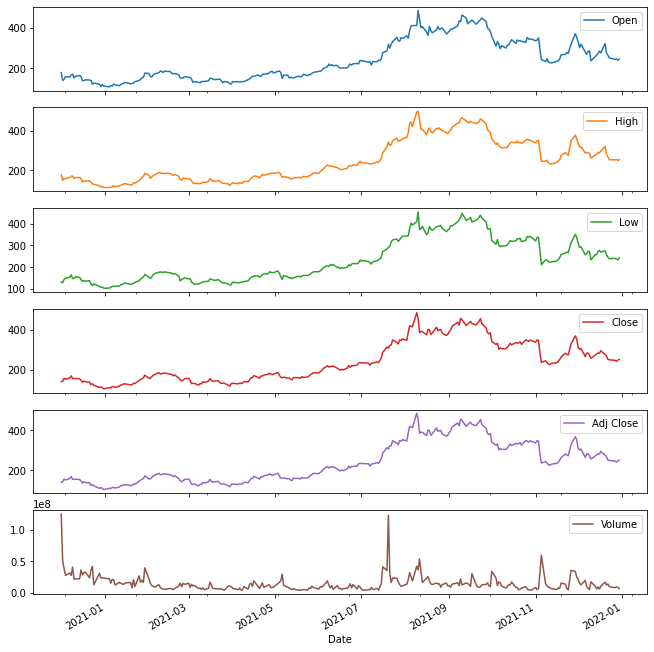

In [12]:
#Here we are plotting the historical data 
df.plot(figsize=(11, 12), subplots=True)

In [15]:
#here we calculate normal return of the asset and its volatility
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.014112513798215844,
 0.09972024130654501,
 -0.030141106447571172,
 0.04589561896087569,
 0.06481943368199679]

In [18]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annualized normal return is %.8f and its annualized volatility is %.8f')

The annualized normal return is %.8f and its annualized volatility is %.8f


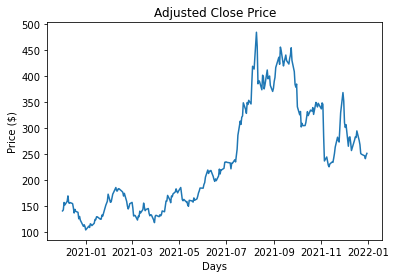

In [19]:
#Here we are plotting the adjusted close 
plt.plot(df['Adj Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Adjusted Close Price');

In [22]:
#here we  calculate continuous compounded return like log reutn 
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.014013859366616867,
 0.09505582137300256,
 -0.03060468863108373,
 0.04487356999493226,
 0.06280523894836725]

In [23]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f' % (lr,lv))

The annualized log return is 0.57900978 and its annualized volatility is 0.84427063


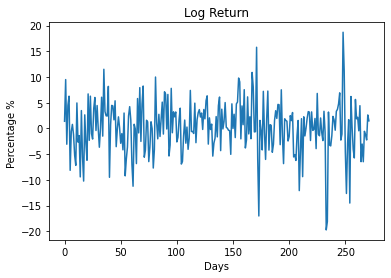

In [25]:
#here we plot the log returns 
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

# Binomial Tree #

In [78]:
#This is the varibale input for the model 

S0 = 251.60                 # spot stock price
K = 200                     # strike
T = 0.5                     # maturity of 6 months
r = 0.0121                  # risk free rate 
sigma = 0.84                # diffusion coefficient or volatility
N = 5                       # number of periods or number of time steps  
payoff = "put"              # payoff 

In [79]:
dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor 

In [80]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [81]:
S

array([[251.6       , 328.15033713, 427.99142988, 558.20958666,
        728.04715441, 949.55850225],
       [  0.        , 192.90719173, 251.6       , 328.15033713,
        427.99142988, 558.20958666],
       [  0.        ,   0.        , 147.90613919, 192.90719173,
        251.6       , 328.15033713],
       [  0.        ,   0.        ,   0.        , 113.40285354,
        147.90613919, 192.90719173],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         86.94843406, 113.40285354],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  66.66525533]])

In [82]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4362323011304196

In [83]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   7.09280827],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  86.59714646],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 133.33474467]])

In [84]:
# To calculate European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 28.91721288,  10.91263384,   1.2663166 ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  42.91090207,  18.40019911,   2.24888686,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  61.9689538 ,  30.93728104,
          3.9938607 ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  86.11373163,
         51.85200716,   7.09280827],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        112.80971229,  86.59714646],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 133.33474467]])

In [85]:
print('European ' + payoff, str( V[0,0]))

European put 28.917212880714875


# Monte Carlo #

In [72]:
S0 = 251.60                 # spot stock price
K = 200                     # strike
T = 0.5                     # maturity of 6 months
r = 0.0121                  # risk free rate 
sigma = 0.84                # diffusion coefficient or volatility 

In [73]:
#Monte Carlo formula 

def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [87]:
#The number of iterations 

S = mcs_simulation_np(6000)

In [88]:
#The number of iterations for Monte Carlo Simulation

S = mcs_simulation_np(6000)

In [89]:
# here we transpose it 
S = np.transpose(S)
S

array([[251.6       , 248.51278576, 246.07212368, ..., 120.21093064,
        121.10316233, 121.00402945],
       [251.6       , 252.0875891 , 253.068225  , ..., 192.37929278,
        189.92138124, 192.163905  ],
       [251.6       , 249.68926538, 247.25047259, ..., 207.43786911,
        208.8089279 , 209.78118358],
       ...,
       [251.6       , 252.41015849, 251.69806146, ..., 557.23121492,
        564.88792882, 562.64767855],
       [251.6       , 249.07198375, 248.70982979, ...,  87.72147812,
         87.28380583,  87.40597865],
       [251.6       , 250.06945372, 249.36536806, ..., 288.65489043,
        288.51676551, 289.46730245]])

In [90]:
#The value of European put 
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 30.722673922912193


Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

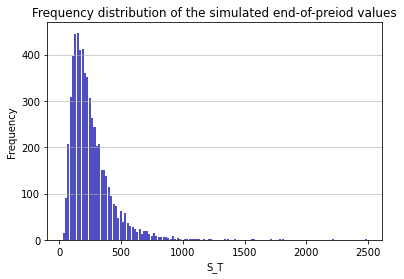

In [91]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

# The Greeks # 

## Delta ## 

In [95]:
#gere is the formula and variables to calculate Delta
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [99]:
print('Delta is', delta (251.60, 200, 0.5, 0.0121, 0, 0.84, 'put'))

Delta is -0.24396877686294927


In [109]:
#The below are the inputs to plot line graph to describe results for Delta
S = np.linspace(300,400,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 200, 0.5, 0.0121, 0, 0.84, 'call')
    Delta_Put [i] = delta(S[i], 200, 0.5, 0.0121, 0, 0.84, 'put')

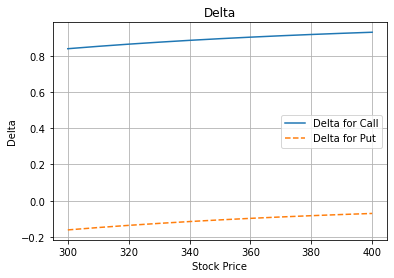

In [110]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [111]:
#Here we are producing the 3d grapah 
S = np.linspace(300, 400, 51)
T = np.linspace(0.1, 1, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 200, T[i], 0.0121, 0, 0.84, 'put')

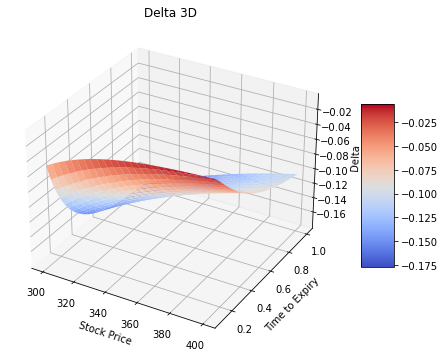

In [112]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
ax.set_title ('Delta 3D')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Gamma ## 

In [113]:
#here we are defing gamma  and the fomula 
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [114]:
print('Gamma is', gamma(251.60, 200, 0.5, 0.0121, 0, 0.84, 'put'))

Gamma is 0.002098803981165492


In [115]:
#here we are putting the inputs for the line grpah
S = np.linspace(300, 400, 51)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 200, 0.5, 0.0121, 0, 0.84, 'put')

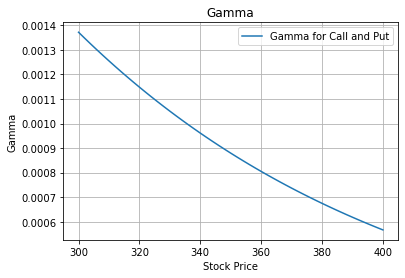

In [116]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [117]:
S = np.linspace(300, 400, 51)
T = np.linspace(0.1, 1, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 200, T[i], 0.0121, 0, 0.84, 'put')

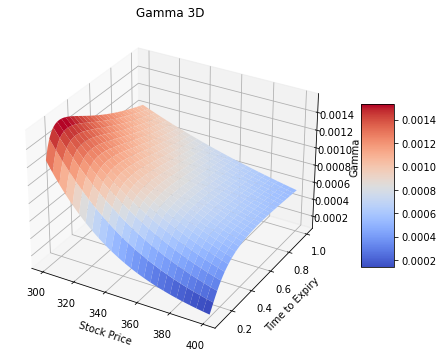

In [118]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
ax.set_title ('Gamma 3D')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Speed ##

In [119]:
#here is the formula for speed
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [120]:
print('Speed is', speed (251.60, 200, 0.5, 0.0121, 0, 0.84, 'put'))


Speed is -1.2786459432659884e-05


In [121]:
# we are creating graph for results for Speed
S = np.linspace(300, 400, 51)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 200, 0.5, 0.0121, 0, 0.84, 'put')

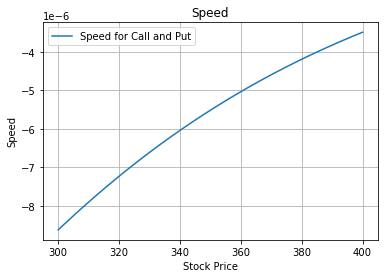

In [122]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

In [123]:
S = np.linspace(300, 400, 51)
T = np.linspace(0.1, 1, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed [i] = speed(S[i], 200, 0.5, 0.0121, 0, 0.84, 'put')

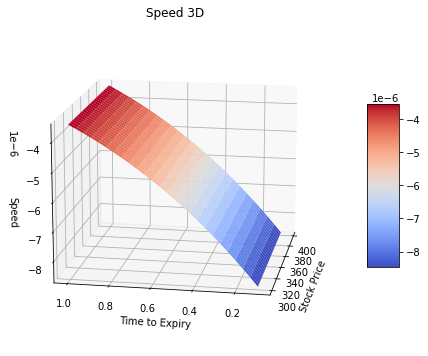

In [124]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
ax.set_title ('Speed 3D')
ax.view_init (15, 190)
fig.colorbar(surf, shrink=0.5, aspect=5);

## Theta ##

In [125]:
# here we are calcuting Thea 
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [126]:
print('Theta is', theta (251.60, 200, 0.5, 0.0121, 0, 0.84, 'put'))

Theta is 47.9801491784165


In [129]:
#here we are creating line grpah 
T = np.linspace(0.1, 1, 51)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(251.60, 200, T[i], 0.5, 0.0121, 0.84, 'call')
    Theta_Put [i] = theta(251.60, 200, T[i], 0.5, 0.0121, 0.84, 'put')

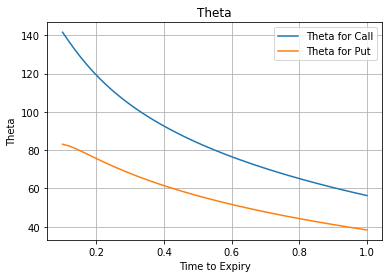

In [130]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [132]:
S = np.linspace(300, 400, 51)
T = np.linspace(0.1, 1, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(251.60, 200, T[i], 0.5, 0.0121, 0.84, 'put')

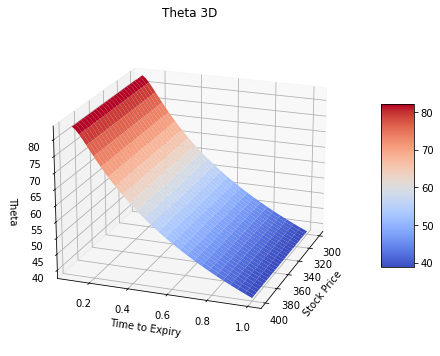

In [133]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
ax.set_title ('Theta 3D')
ax.view_init (20, 20)
fig.colorbar(surf, shrink=0.5, aspect=5);

## RHO ##

In [134]:
# lastly we are defining variables for rho and formula 
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [135]:
print('Rho is', rho (251.60, 200, 0.5, 0.0121, 0, 0.84, 'put'))


Rho is -45.75452006112379


In [136]:
#creating line graph for rho
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(251.60, 200, 0.5, r[i], 0.0121, 0.84, 'call')
    Rho_Put [i] = rho(251.60, 200, 0.5, r[i], 0.0121, 0.84, 'put')

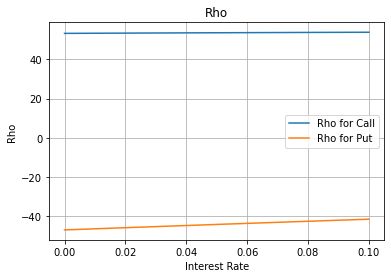

In [137]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [138]:
S = np.linspace(300, 400, 51)
T = np.linspace(0.1, 1, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 200, T[i], 0.0121, 0, 0.84, 'put')

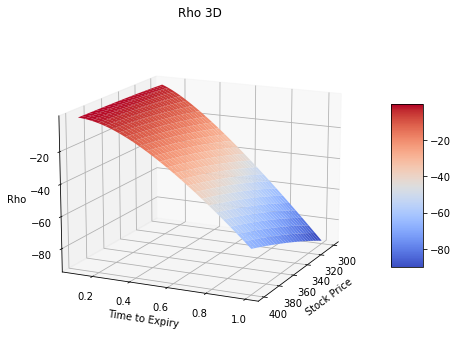

In [139]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
ax.set_title ('Rho 3D')
ax.view_init (15, 25)
fig.colorbar(surf, shrink=0.5, aspect=5);
